In [102]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline


In [103]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'


In [104]:
file = pd.read_csv(path)
print(file.head())

   Unnamed: 0.1  Unnamed: 0 loan_status  Principal  terms effective_date  \
0             0           0     PAIDOFF       1000     30       9/8/2016   
1             2           2     PAIDOFF       1000     30       9/8/2016   
2             3           3     PAIDOFF       1000     15       9/8/2016   
3             4           4     PAIDOFF       1000     30       9/9/2016   
4             6           6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male  


In [105]:
file['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [106]:
!pip install seaborn
import seaborn as sns


In [107]:
file.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [108]:
file['due_date'] = pd.to_datetime(file['due_date'])
file['effective_date'] = pd.to_datetime(file['effective_date'])
file.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [109]:
file['Principal'].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

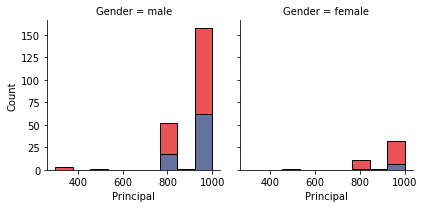

In [110]:
bins= np.linspace(file['Principal'].min(), file['Principal'].max(), 10)
g = sns.FacetGrid(data= file, col= 'Gender', hue= 'loan_status',palette='Set1',col_wrap= 2)
g.map(sns.histplot, 'Principal', bins=bins, ec= 'k')
plt.show()
g.axes[-1].legend()


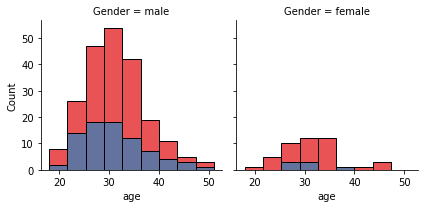

In [111]:
bins= np.linspace(file.age.min(), file.age.max(), 10)
g= sns.FacetGrid(data=file, col='Gender', hue='loan_status', palette='Set1', col_wrap=2, legend_out= True)
g.map(sns.histplot, 'age', bins=bins)
plt.show()


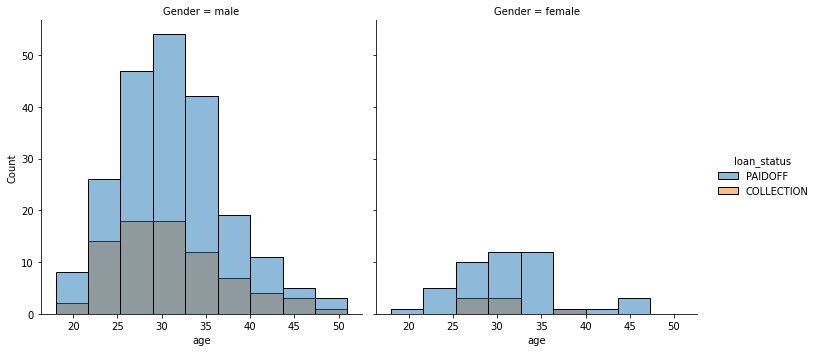

In [112]:
sns.displot(data=file,x='age',bins=bins,col='Gender', hue='loan_status')

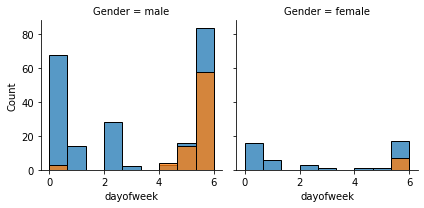

In [113]:
file['dayofweek']= file['effective_date'].dt.dayofweek
bins = np.linspace(file.dayofweek.min(), file.dayofweek.max(), 10)
g = sns.FacetGrid(data= file, col= 'Gender', hue='loan_status')
g.map(sns.histplot, 'dayofweek', bins=bins)

In [114]:
file['weekend'] = file['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)
file.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [115]:
file['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
file.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [116]:
file.groupby(['education'])['loan_status'].value_counts(normalize=True)
feature = file[['Principal','terms','age','Gender','weekend']]
feature = pd.concat([feature, pd.get_dummies(file['education'])], axis=1)
feature.drop(['Master or Above'], axis = 1,inplace=True)

feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [117]:

y = file['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [118]:
X = preprocessing.StandardScaler().fit(feature).transform(feature)
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [119]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [120]:
test_scores= {}
train_scores= {}
neighbors= np.arange(1,20)
for neighbor in neighbors:
    k_model= KNeighborsClassifier(n_neighbors=neighbor)
    k_model.fit(X_train, y_train)
    accuracystest = k_model.score(X_test, y_test)
    accuracystrain = k_model.score(X_train, y_train)
    test_scores[neighbor]= accuracystest
    train_scores[neighbor] =accuracystrain
##print('test_scores {}, train_scores {}'.format(test_scores, train_scores))
test_list = list(test_scores.values())
train_list = list(train_scores.values())
plt.plot( neighbors, test_list, color= 'r')
plt.plot( neighbors, train_list, color= 'g')

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0] and y_pred=['COLLECTION' 'PAIDOFF']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4, stratify=y)
kmodel = KNeighborsClassifier(n_neighbors= 5).fit(X_train, y_train)

In [ ]:
kmodel.predict(X_test)

In [121]:
kmodel.score(X_test, y_test)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0] and y_pred=['COLLECTION' 'PAIDOFF']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
scores= {}
max_depths= np.arange(2,8)
for max_depth in max_depths:   
    dmodel = DecisionTreeClassifier(max_depth= max_depth,random_state= 4).fit(X_train, y_train)
    y_pred= dmodel.predict(X_test)
    scores[max_depth]= dmodel.score(X_test, y_test)
print(scores)
    
    

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0] and y_pred=['PAIDOFF']. Make sure that the predictions provided by the classifier coincides with the true labels.

In [124]:
from sklearn.linear_model import LogisticRegression